In [11]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
def load_data(file):
    data = []
    label = []
    with open(file,"r") as data_file:
        raw_data = data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample = sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=1000
            sample[-2]/=1000
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)

In [17]:
train_data,train_label=load_data("./train.data")
test_data,test_label=load_data("./test.data")

array([0.  , 0.06, 0.  ])

In [18]:
clf = svm.SVC(C=1.0, kernel='linear', decision_function_shape='ovr')
clf.fit(train_data,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print (clf.score(train_data, train_label))
print (clf.score(test_data, test_label))

0.9339330024813896
0.9375453885257807


In [20]:
distance = clf.decision_function(train_data)
distance

array([ 0.46868496,  6.87691061,  0.81016972, ..., -2.59247308,
       -1.6524085 , -2.3177059 ])

In [51]:
x = train_data[:, :2]
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = clf.predict(train_data) 

ValueError: not enough values to unpack (expected 2, got 1)

/home/wx/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


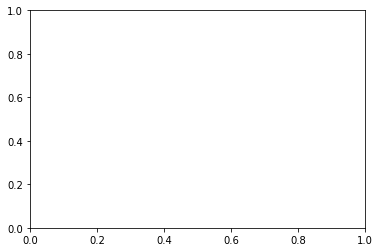

In [53]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
# plt.grid()
plt.show()

In [30]:
def load_pred_data(file):
    data = []
    with open(file,"r") as data_file:
        raw_data = data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample = sample.split(",")
            sample=np.array([float(feature) for feature in sample[:]])
            sample[-3]/=1000
            sample[-2]/=1000
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)

In [31]:
flag_data = load_pred_data("./get_the_flag.data")

In [34]:
pred = clf.predict(flag_data)

In [45]:
pred = list(map(int,pred))
pred = np.array(pred)

In [46]:
pred = pred.reshape(560,1)

In [47]:
rpred = pred.reshape(56,10)

In [48]:
rpred

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1,

In [49]:
count = ''
for i in range(rpred.shape[0]):
    if(sum(rpred[i])>5):
        count += '1'
    else:
        count += '0'

print(count)

10001001110101110100111011011100100101111110000011001001


In [50]:
str = '10001001110101110100111011011100100101111110000011001001'
flag = '10001001110101110100111011011100100101111110000011001001' 
if str == flag:
    print("T")
else:
    pass

T
